# Social Networking Apps/Sites Usage of Filipinos During Enhanced Community Quarantine (ECQ)

An Unofficial Online Survey conducted during the implementation of Enhanced Community Quarantine (ECQ) in the Philippines as part of my Capstone Project on my Data Engineering course at Project SPARTA (Smarter Philippines through Data Analytics R&D, Training and Adoption).
 
## Background of Study

As of January 2020, the world’s internet users will spend a cumulative 1.25 billion years online with more than one-third of that time spent using social media. And the Philippines ranked as the highest internet user spending with an average of 9 hours and 45 minutes per day online. But the data was collected before the COVID-19 pandemic crisis and before the implementation of Enhanced Community Quarantine (ECQ) in the Philippines.

### Purpose

The main purpose of my research is to identify the changes and the effect of the implementation of Enhanced Community Quarantine (ECQ) on Social Networking Apps/Site usage amongst Filipinos.

### Contents

1. A demographics of respondents that shows:
    - Age
    - Sex
    - Location/Residence (by Region)
2. A side-by-side comparison of Social Site usage before and during the implementation of Enhanced Community Quarantine (ECQ) in the Philippines.

### Disclaimer

1. This is a small unofficial survey with 50 respondents from different parts of the Philippines who participated in the online survey conducted during the implementation of Enhanced Community Quarantine (ECQ).
2. The survey conducted did not follow any statistical principles and solutions.
3. Please bear in mind that this is an experimental project that I do to enhance my skills in Data Engineering.

### Importing of Data from a CSV file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/survey_data.csv')

### Counting and Filtering Functions

In [49]:
def count_if(array, condition):
    return (array == condition).sum()

def count_from_labels(array, labels):
    count = []
    for i in range(len(labels)):
        count.append(count_if(array, labels[i]))
    return count

### Create Pie Chart Function

In [50]:
def create_pie(figure_title, data, labels, legend_title):
    fig, ax = plt.subplots(figsize=(6,12), subplot_kw=dict(aspect="equal"))

    wedges, texts, autotexts = ax.pie(data, autopct= '%1.1f%%', textprops=dict(color="w"))

    ax.legend(wedges, labels, title=legend_title, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=15, weight='bold')

    ax.set_title(figure_title)

    plt.show()

### Demographics of the Respondents

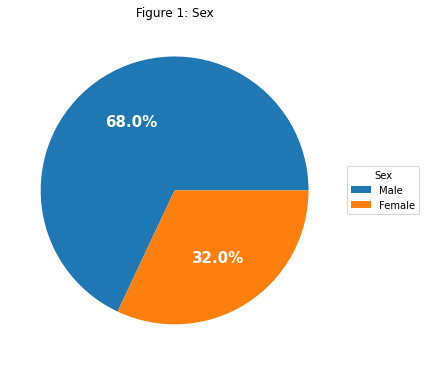

In [52]:
labels = 'Male', 'Female'
sizes = count_from_labels(df.sex, labels)

create_pie('Figure 1: Sex', sizes, labels, 'Sex')